In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('hearing_test.csv')

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [5]:
df.shape

(5000, 3)

In [6]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [7]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='count'>

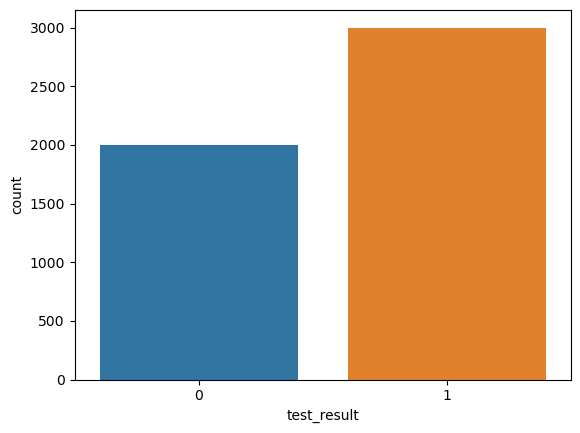

In [8]:
sns.countplot(data = df,x = 'test_result')

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

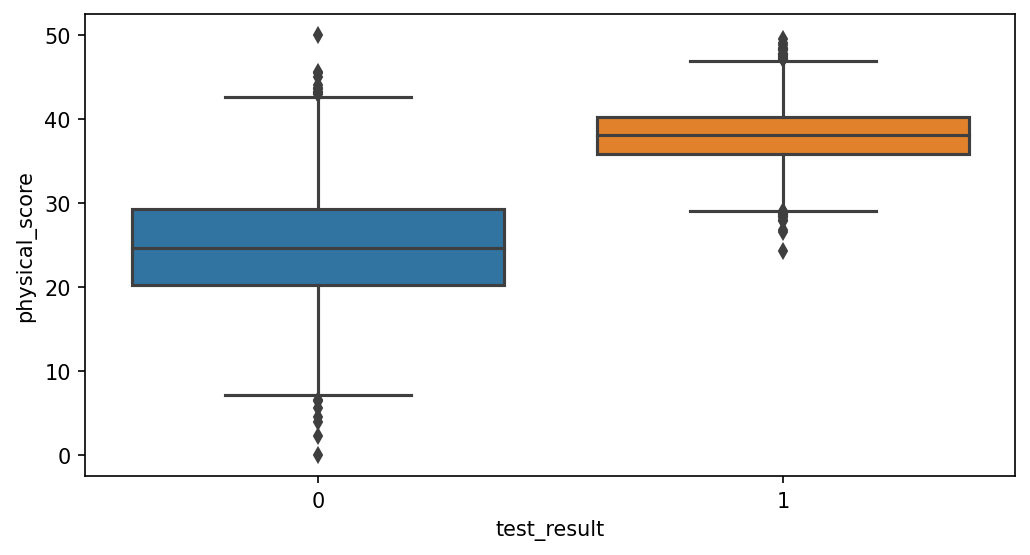

In [9]:
plt.figure(figsize = (8,4),dpi = 150)
sns.boxplot(data = df,x = 'test_result',y = 'physical_score')

<AxesSubplot:xlabel='age', ylabel='physical_score'>

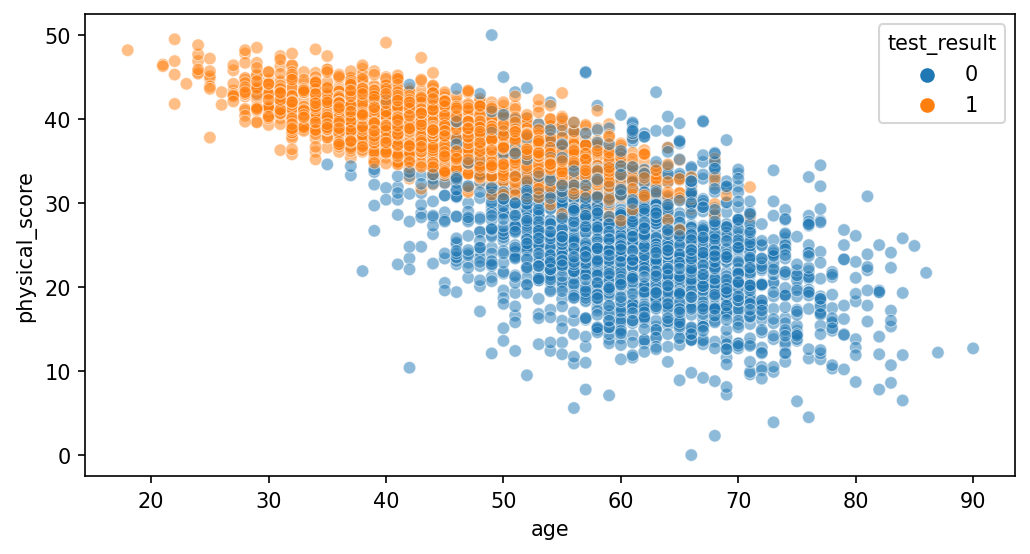

In [10]:
plt.figure(figsize= (8,4),dpi = 150)
sns.scatterplot(x = 'age',y = 'physical_score',data = df,hue = 'test_result',alpha = 0.5)

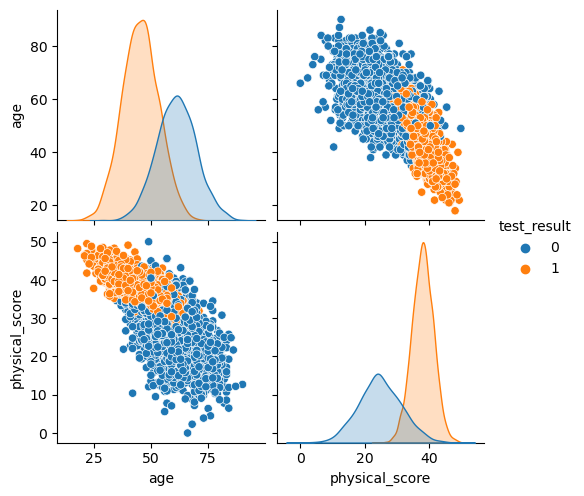

In [11]:
sns.pairplot(df,hue = 'test_result')

<AxesSubplot:>

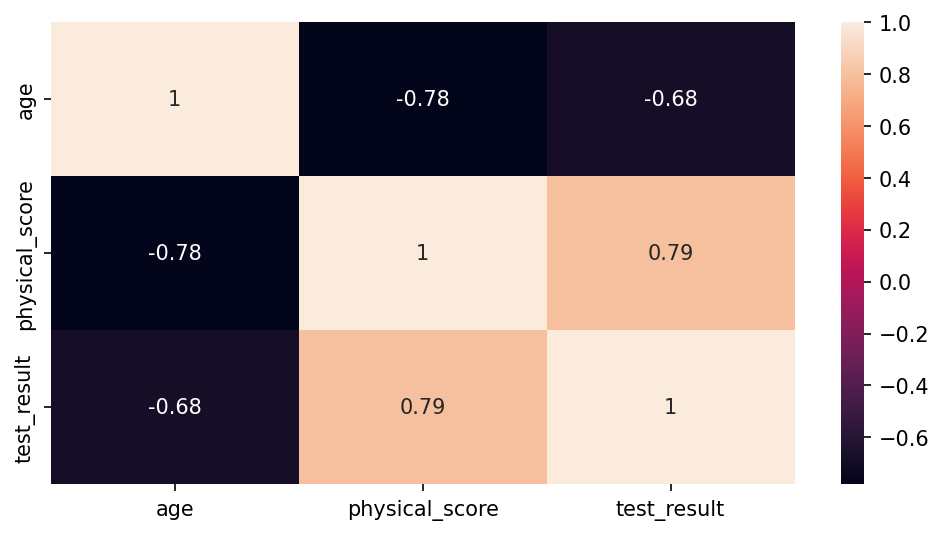

In [12]:
plt.figure(figsize = (8,4),dpi = 150)
sns.heatmap(df.corr(),annot = True)

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

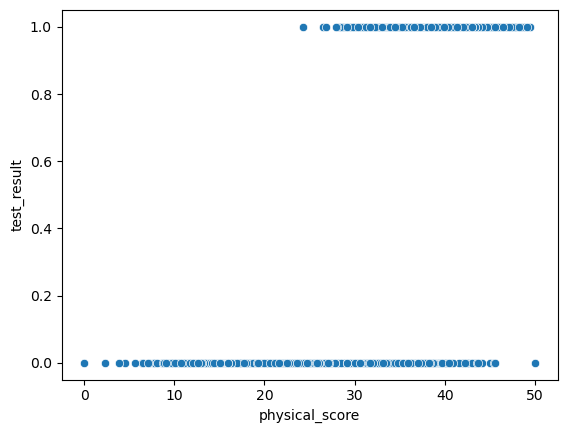

In [13]:
sns.scatterplot(x = 'physical_score',y = 'test_result',data = df)

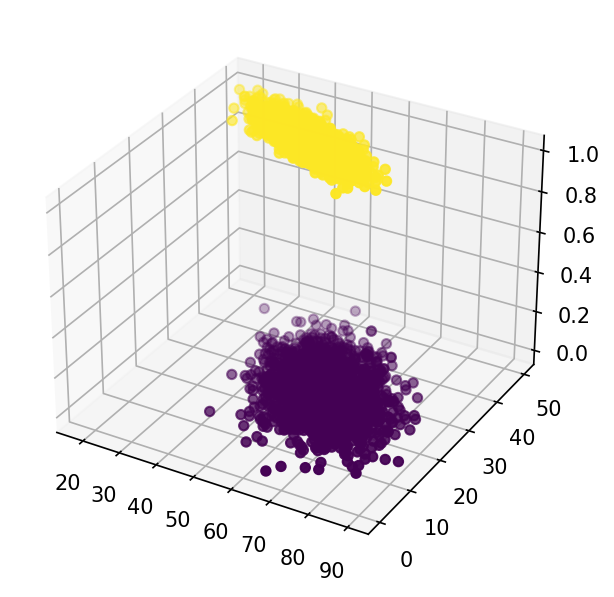

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(dpi = 150)
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c = df['test_result'])

In [15]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [16]:
X=df.drop('test_result',axis = 1)

In [17]:
y = df['test_result']

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [20]:
scaler = StandardScaler()

In [21]:
scaled_X_train = scaler.fit_transform(X_train)

In [22]:
scaled_X_test = scaler.transform(X_test)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
log_model = LogisticRegression()

In [25]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [26]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [27]:
y_pred = log_model.predict_proba(scaled_X_test)

In [28]:
y_pred

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [30]:
y_pred = log_model.predict(scaled_X_test)

In [32]:
accuracy_score(y_test,y_pred)

0.93

In [33]:
confusion_matrix(y_test,y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

In [34]:
from sklearn.metrics import plot_confusion_matrix

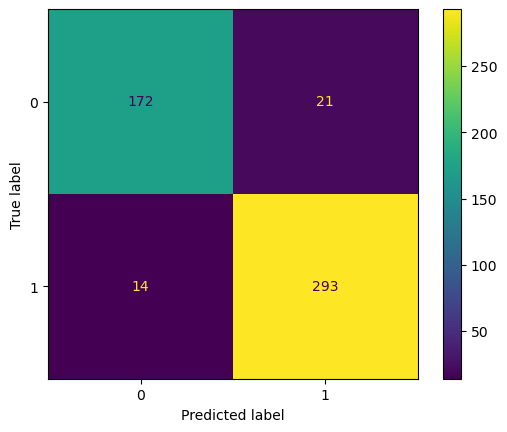

In [35]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

In [36]:
len(y_test)

500

In [37]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.92      0.89      0.91       193\n           1       0.93      0.95      0.94       307\n\n    accuracy                           0.93       500\n   macro avg       0.93      0.92      0.93       500\nweighted avg       0.93      0.93      0.93       500\n'

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [39]:
from sklearn.metrics import precision_score,recall_score

In [40]:
precision_score(y_test,y_pred)

0.9331210191082803

In [41]:
recall_score(y_test,y_pred)

0.9543973941368078

In [42]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

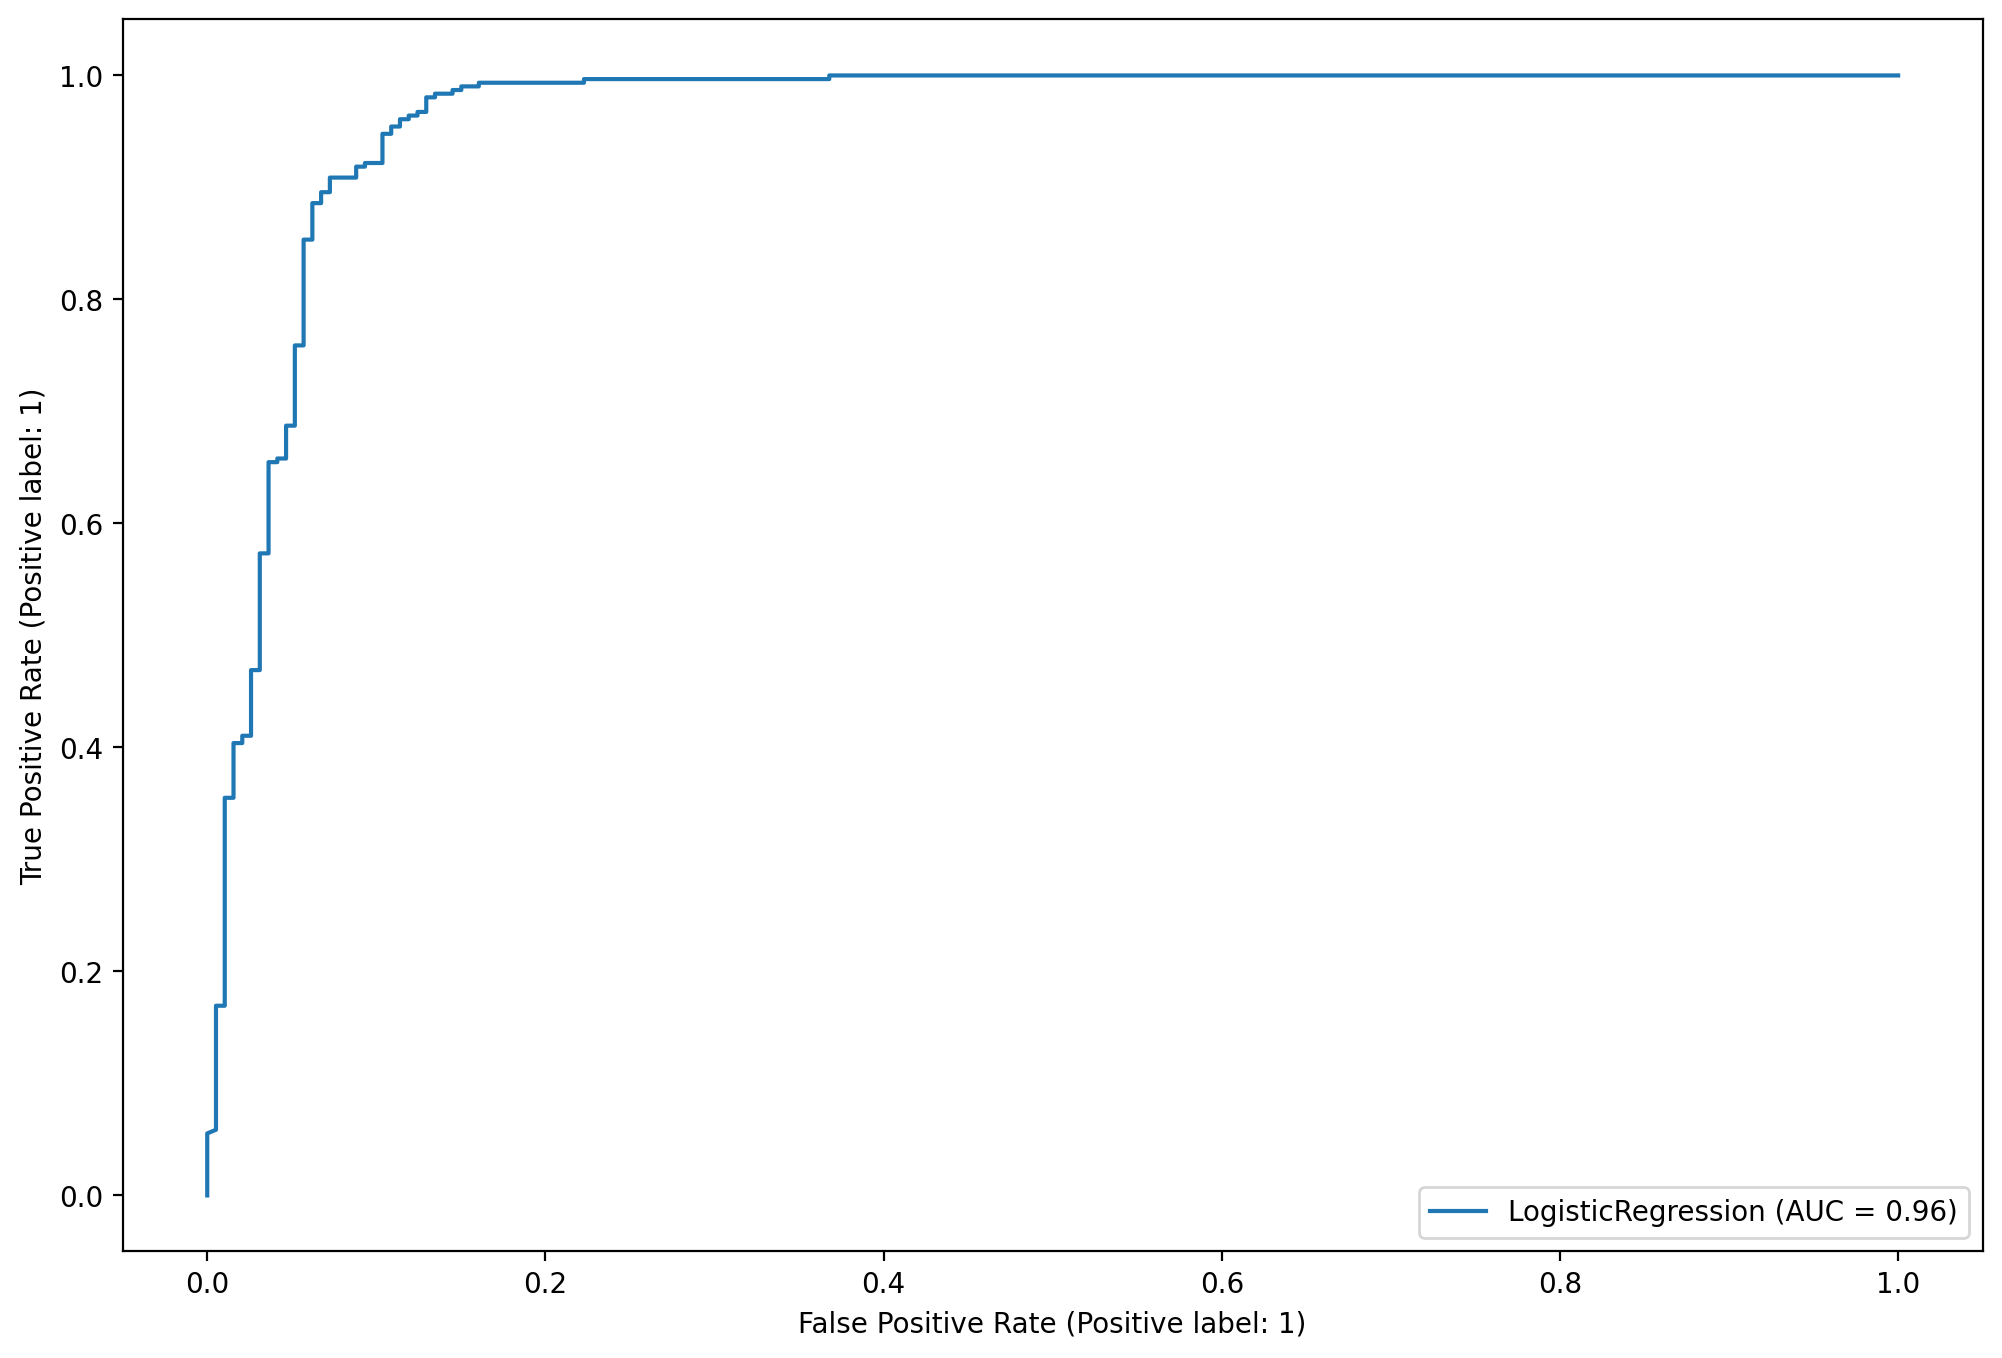

In [43]:
fig,axes = plt.subplots(figsize = (12,8),dpi = 200)
plot_roc_curve(log_model,scaled_X_test,y_test,ax = axes)

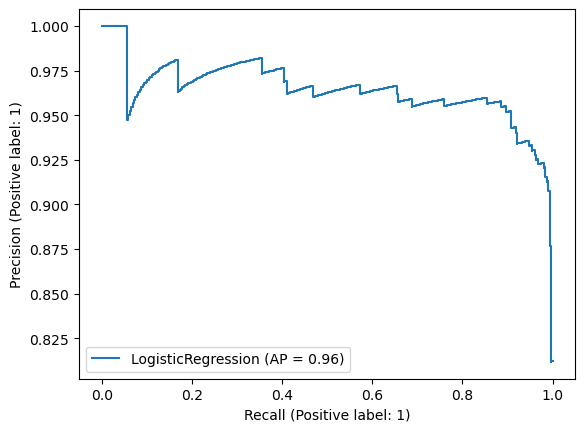

In [44]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

In [45]:
log_model.predict_proba(scaled_X_test)[0]

array([0.02384343, 0.97615657])

In [46]:
y_test[0]

1

# Now we will apply KNN Classifier.

In [47]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
test_error_rates = []

In [50]:
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)
    y_pred = knn_model.predict(scaled_X_test)
    
    test_errors = 1 - accuracy_score(y_test,y_pred)
    test_error_rates.append(test_errors)

Text(0, 0.5, 'Error Rates')

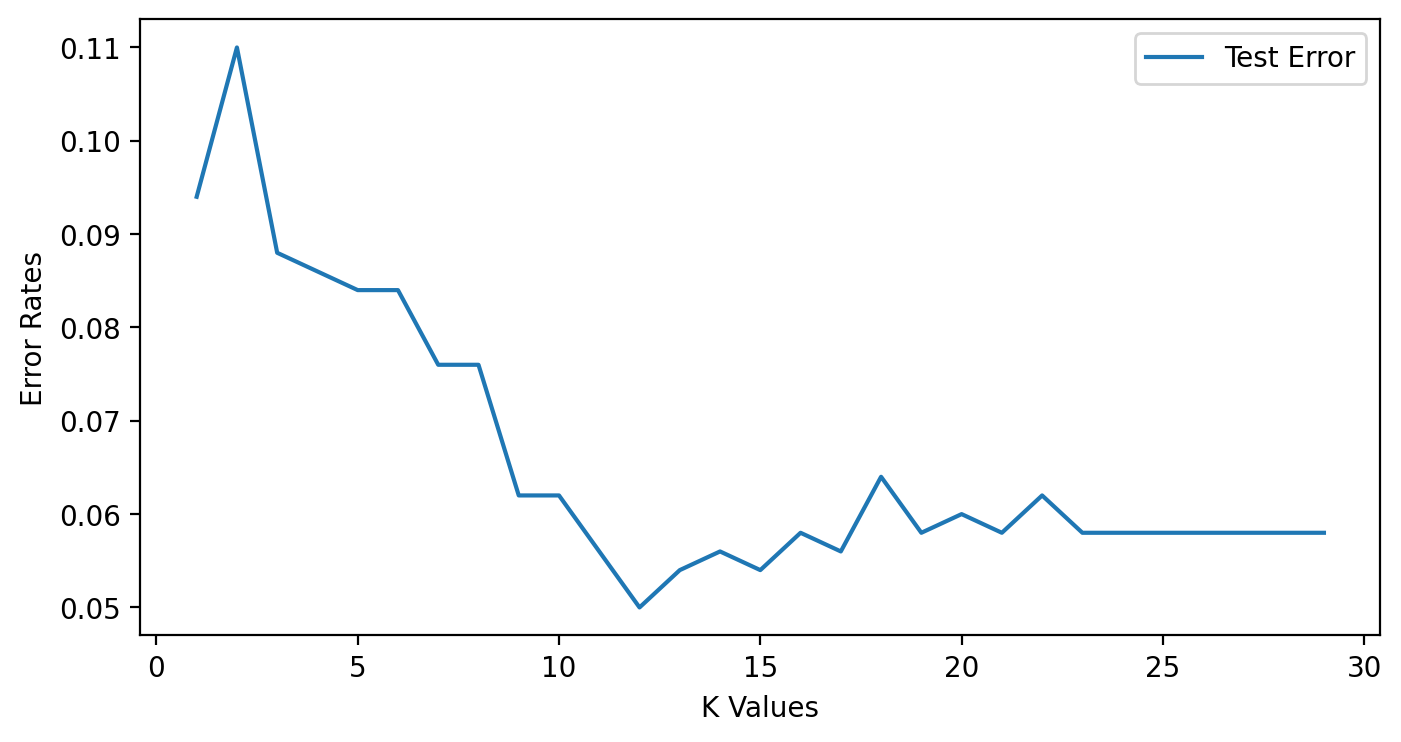

In [51]:
plt.figure(figsize = (8,4),dpi = 200)
plt.plot(range(1,30),test_error_rates,label = 'Test Error')
plt.legend()
plt.xlabel('K Values')
plt.ylabel('Error Rates')

## Now we will use grid search to get the best k value.

In [52]:
scaler = StandardScaler()
knn = KNeighborsClassifier()

In [53]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [54]:
operations = [('scaler',scaler),('knn',knn)]

In [55]:
from sklearn.pipeline import Pipeline

In [56]:
pipe = Pipeline(operations)

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
k_values = list(range(1,20))

In [59]:
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [60]:
param_grid = {'knn__n_neighbors':k_values}

In [61]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv = 5,scoring = 'accuracy')

In [62]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [63]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=9))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=9),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 9,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [64]:
full_cv_classifier.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knn__n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [65]:
len(k_values)

19

In [66]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.88644444, 0.87222222, 0.91888889, 0.91066667, 0.92244444,
       0.91955556, 0.92488889, 0.92155556, 0.92688889, 0.92422222,
       0.92488889, 0.92355556, 0.92511111, 0.924     , 0.92244444,
       0.92444444, 0.92422222, 0.92422222, 0.92511111])

In [67]:
len(full_cv_classifier.cv_results_['mean_test_score'])

19

# Final Model for knn

In [68]:
scaler = StandardScaler()
knn9 = KNeighborsClassifier(n_neighbors=9)
operations = [('scaler',scaler),('knn9',knn9)]

In [69]:
pipe = Pipeline(operations)

In [70]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn9', KNeighborsClassifier(n_neighbors=9))])

In [71]:
pipe_pred = pipe.predict(X_test)

In [72]:
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       193
           1       0.93      0.97      0.95       307

    accuracy                           0.94       500
   macro avg       0.94      0.93      0.93       500
weighted avg       0.94      0.94      0.94       500



In [73]:
sample = X_test.iloc[25]

In [74]:
sample

age               60.0
physical_score    32.9
Name: 3200, dtype: float64

In [75]:
pipe.predict(sample.values.reshape(1,-1))

array([1], dtype=int64)

In [76]:
pipe.predict_proba(sample.values.reshape(1,-1))

array([[0.44444444, 0.55555556]])

In [77]:
y_test.iloc[25]

1

# Now we will apply Decision Tree Algorithm

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [79]:
scaler_tree = StandardScaler()
dec_tree = DecisionTreeClassifier()

In [80]:
operations = [('scaler_tree',scaler_tree),('dec_tree',dec_tree)]

In [81]:
pipe_tree = Pipeline(operations)

In [82]:
depth = list(range(1,20))
leaf_nodes = list(range(1,20))

In [83]:
param_grid = {'dec_tree__max_depth':depth,'dec_tree__max_leaf_nodes':leaf_nodes}

In [84]:
dec_tree_classifier = GridSearchCV(pipe_tree,param_grid,cv = 5,scoring = 'accuracy')

In [85]:
dec_tree_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler_tree', StandardScaler()),
                                       ('dec_tree', DecisionTreeClassifier())]),
             param_grid={'dec_tree__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                 11, 12, 13, 14, 15, 16, 17, 18,
                                                 19],
                         'dec_tree__max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19]},
             scoring='accuracy')

In [86]:
dec_tree_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler_tree', StandardScaler()),
  ('dec_tree', DecisionTreeClassifier(max_depth=5, max_leaf_nodes=16))],
 'verbose': False,
 'scaler_tree': StandardScaler(),
 'dec_tree': DecisionTreeClassifier(max_depth=5, max_leaf_nodes=16),
 'scaler_tree__copy': True,
 'scaler_tree__with_mean': True,
 'scaler_tree__with_std': True,
 'dec_tree__ccp_alpha': 0.0,
 'dec_tree__class_weight': None,
 'dec_tree__criterion': 'gini',
 'dec_tree__max_depth': 5,
 'dec_tree__max_features': None,
 'dec_tree__max_leaf_nodes': 16,
 'dec_tree__min_impurity_decrease': 0.0,
 'dec_tree__min_samples_leaf': 1,
 'dec_tree__min_samples_split': 2,
 'dec_tree__min_weight_fraction_leaf': 0.0,
 'dec_tree__random_state': None,
 'dec_tree__splitter': 'best'}

In [87]:
des_tree_model = DecisionTreeClassifier(max_depth=5,max_leaf_nodes=16,criterion='entropy')

In [88]:
des_tree_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=16)

In [89]:
des_model_pred = des_tree_model.predict(X_test)

In [90]:
print(classification_report(y_test,des_model_pred))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       193
           1       0.92      0.99      0.95       307

    accuracy                           0.94       500
   macro avg       0.95      0.93      0.94       500
weighted avg       0.94      0.94      0.94       500



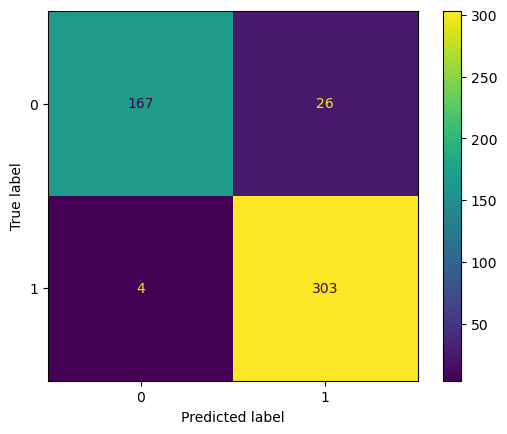

In [91]:
plot_confusion_matrix(des_tree_model,X_test,y_test)

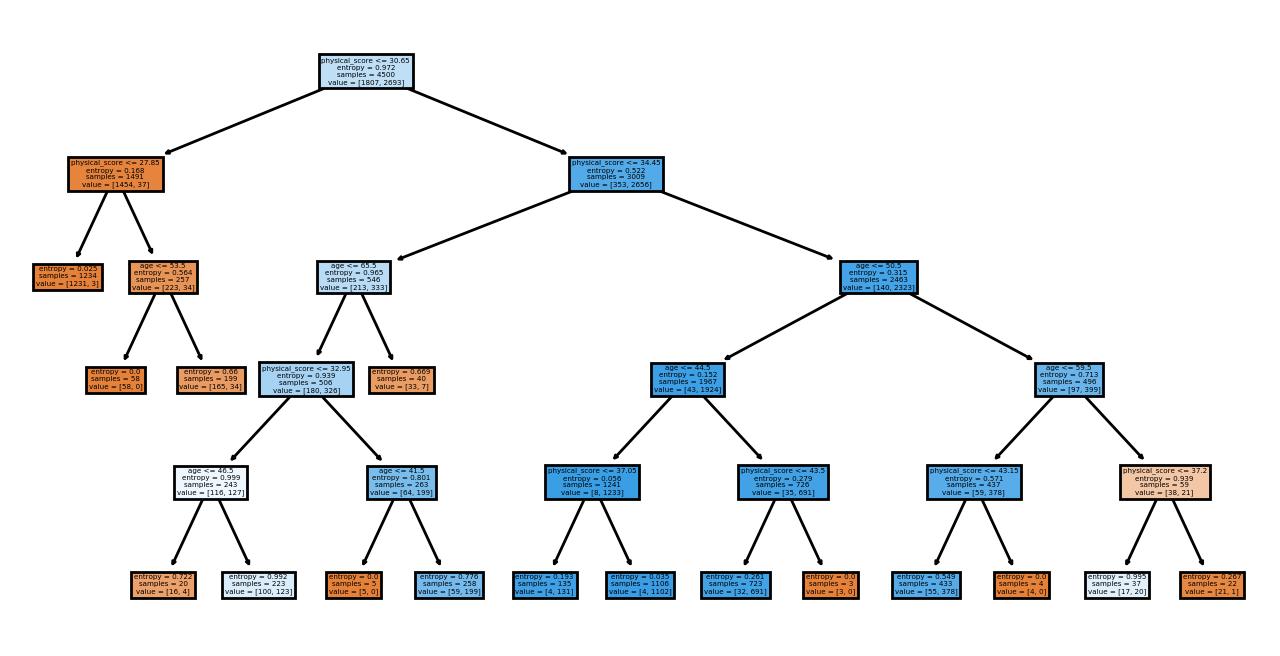

In [93]:
plt.figure(figsize = (8,4),dpi = 200)
plot_tree(des_tree_model,filled = True,feature_names=X.columns);